In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [111]:
data = pd.read_csv("student_assignment.csv")

In [112]:
data

,Age,Income,Is Student,Num Children,Temperature,Rating
0,43.0,45893.41,True,0.0,38.2,2.6
1,56.0,69663.07,True,1.0,38.7,3.2
2,NaN,45124.06,False,5.0,36.9,3.9
3,37.0,76724.60,False,2.0,41.6,2.5
4,53.0,58343.03,False,1.0,36.5,3.3
...,...,...,...,...,...,...
99,42.0,46673.04,False,5.0,38.8,10.9
100,35.0,27089.59,True,5.0,35.3,1.6
101,61.0,83082.63,True,4.0,35.6,3.7
102,39.0,61868.49,True,5.0,37.1,3.8


In [113]:
data.isna().sum()

Age             1
Income          0
Is Student      0
Num Children    3
Temperature     0
Rating          0
dtype: int64

In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           103 non-null    float64
 1   Income        104 non-null    float64
 2   Is Student    104 non-null    object 
 3   Num Children  101 non-null    float64
 4   Temperature   104 non-null    float64
 5   Rating        104 non-null    float64
dtypes: float64(5), object(1)
memory usage: 5.0+ KB


In [115]:
data. duplicated().sum()

3

In [116]:
data = data.drop_duplicates()

In [117]:
data. duplicated().sum()

0

In [118]:
data.isna().sum()

Age             1
Income          0
Is Student      0
Num Children    3
Temperature     0
Rating          0
dtype: int64

<AxesSubplot:>

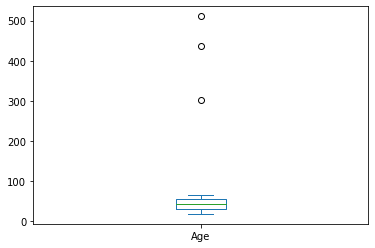

In [119]:
data['Age'].plot(kind = 'box')

In [120]:
for col_name in data.select_dtypes(include=np.number).columns[:-1]:
    print(col_name)
    q1 = data[col_name].quantile(0.25)
    q3 = data[col_name].quantile(0.75)
    iqr = q3 - q1
    
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    print("Outliers = ",data.loc[(data[col_name] < low) | (data[col_name] > high), col_name])

Age
Outliers =  7     511.0
19    301.0
47    438.0
Name: Age, dtype: float64
Income
Outliers =  Series([], Name: Income, dtype: float64)
Num Children
Outliers =  82    40.0
Name: Num Children, dtype: float64
Temperature
Outliers =  Series([], Name: Temperature, dtype: float64)


In [121]:
data = data[~(data['Age']>100)]

<AxesSubplot:>

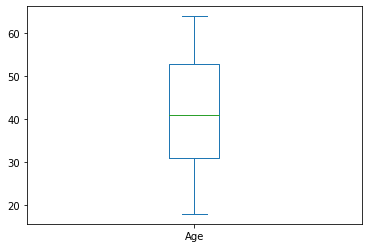

In [122]:
data['Age'].plot(kind = 'box')

In [123]:
data['Age'].isna().sum()

1

In [124]:
data['Age'].median()

41.0

In [125]:
data['Age'].fillna(data['Age'].median(), inplace = True)

In [126]:
data.isna().sum()

Age             0
Income          0
Is Student      0
Num Children    2
Temperature     0
Rating          0
dtype: int64

In [127]:
data['Income']

0      45893.41
1      69663.07
2      45124.06
3      76724.60
4      58343.03
         ...   
96     90964.58
97     70679.33
98     97052.37
99     46673.04
101    83082.63
Name: Income, Length: 98, dtype: float64

<AxesSubplot:>

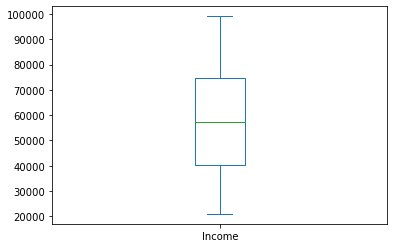

In [128]:
data['Income'].plot(kind = "box")

In [129]:
data['Is Student'].isna().sum()

0

In [130]:
data['Num Children'].count()

96

<AxesSubplot:>

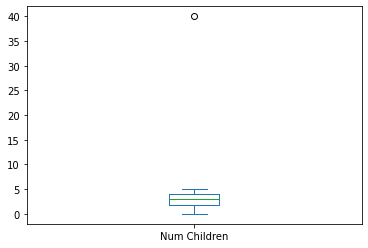

In [131]:
data['Num Children'].plot(kind = 'box')

In [132]:
data['Num Children'].unique()

array([ 0.,  1.,  5.,  2.,  3.,  4., nan, 40.])

In [133]:
data['Num Children'].mean()

3.0520833333333335

In [134]:
data['Num Children'].median()

3.0

In [135]:
data ['Num Children'].fillna(data['Num Children'].median(), inplace = True)

In [136]:
data['Num Children'].isna().sum()

0

In [137]:
data.isna().sum()

Age             0
Income          0
Is Student      0
Num Children    0
Temperature     0
Rating          0
dtype: int64

<AxesSubplot:>

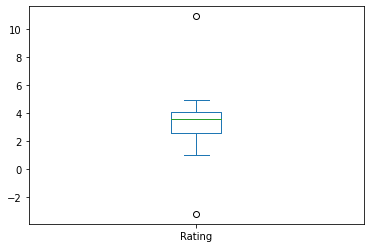

In [138]:
data['Rating'].plot(kind = 'box')

In [139]:
data['Rating'].count()

98

In [140]:
for col_name in data.select_dtypes(include=np.number).columns[0:]:
    print(col_name)
    q1 = data[col_name].quantile(0.25)
    q3 = data[col_name].quantile(0.75)
    iqr = q3 - q1
    
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    print("Outliers = ",data.loc[(data[col_name] < low) | (data[col_name] > high), col_name])

Age
Outliers =  Series([], Name: Age, dtype: float64)
Income
Outliers =  Series([], Name: Income, dtype: float64)
Num Children
Outliers =  82    40.0
Name: Num Children, dtype: float64
Temperature
Outliers =  Series([], Name: Temperature, dtype: float64)
Rating
Outliers =  57    -3.2
99    10.9
Name: Rating, dtype: float64


In [142]:
data_num = data.select_dtypes(include = np.number)
scaling = StandardScaler()
data_scale = pd.DataFrame(scaling.fit_transform(data_num), columns = data_num.columns )

In [143]:
data_scale

,Age,Income,Num Children,Temperature,Rating
0,0.073362,-0.572827,-0.750241,-0.106893,-0.504944
1,1.089262,0.497149,-0.504343,0.135596,-0.093145
2,-0.082931,-0.607459,0.479251,-0.737365,0.387287
3,-0.395515,0.815019,-0.258444,1.542034,-0.573578
4,0.854823,-0.012416,-0.504343,-0.931357,-0.024512
...,...,...,...,...,...
93,0.464092,1.456022,-0.258444,0.232592,0.387287
94,1.245554,0.542895,0.233353,1.396540,1.004986
95,0.620385,1.730060,-0.258444,-0.640370,0.867720
96,-0.004784,-0.537733,0.479251,0.184094,5.191613


In [145]:
data.isna().sum()

Age             0
Income          0
Is Student      0
Num Children    0
Temperature     0
Rating          0
dtype: int64

Age


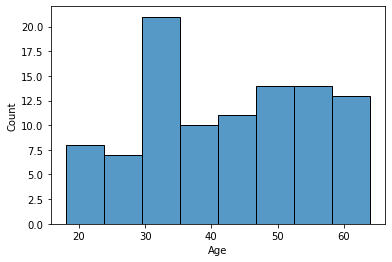

Income


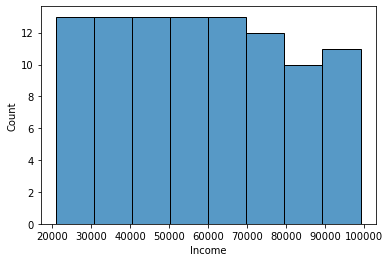

Num Children


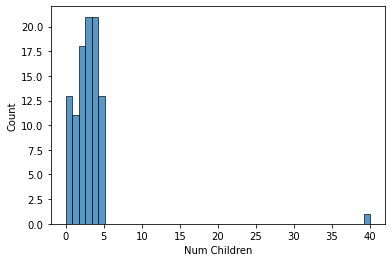

Temperature


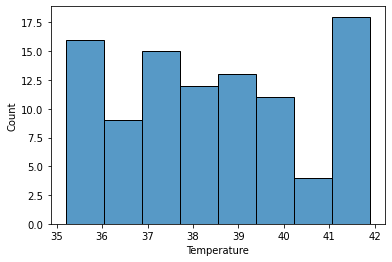

Rating


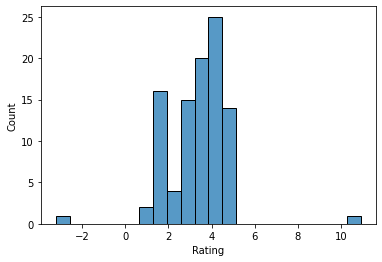

In [146]:
for col in data.select_dtypes(include = np.number).columns:
    print(col)
    sns.histplot(data[col])
    plt.show()

Is Student


/opt/conda/envs/anaconda-2022.05-py39/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


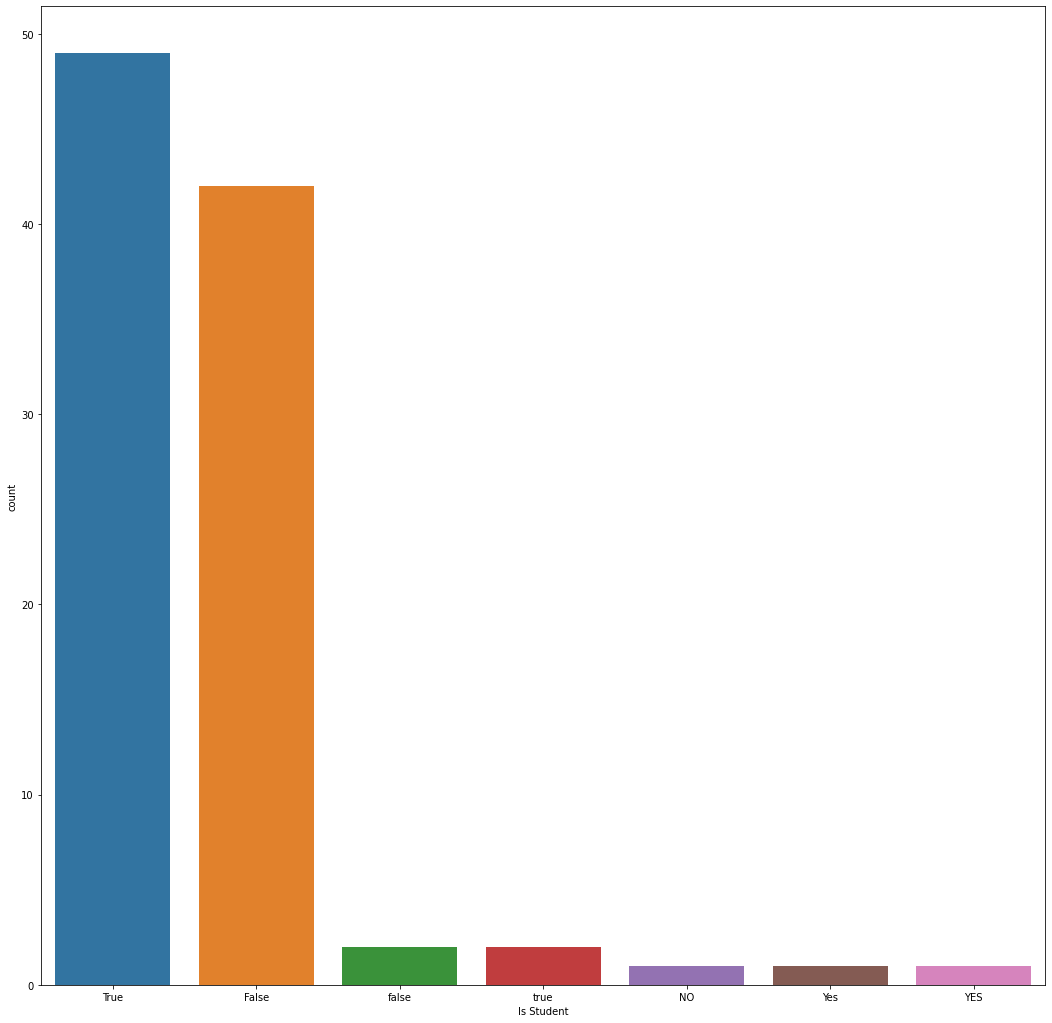

In [147]:
for col in data.select_dtypes(exclude = np.number).columns:
    print(col)
    plt.figure(figsize=(18,18))
    sns.countplot(data[col], order=data[col].value_counts().index)
    plt.show()